In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df.shape

(96, 4)

In [6]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [7]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [11]:
df = df.rename({"Life expectancy at birth (years)":"LEABY"}, axis = 'columns')
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Text(0.5, 6.79999999999999, 'GDP in Trillions of U.S. Dollars')

<Figure size 576x432 with 0 Axes>

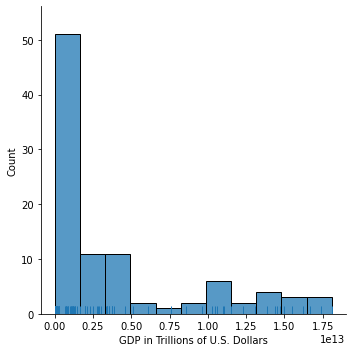

In [14]:
plt.figure(figsize=(8,6))
sns.displot(df.GDP, rug=True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")

Text(0.5, 6.79999999999999, 'Life expectancy at birth (years)')

<Figure size 576x432 with 0 Axes>

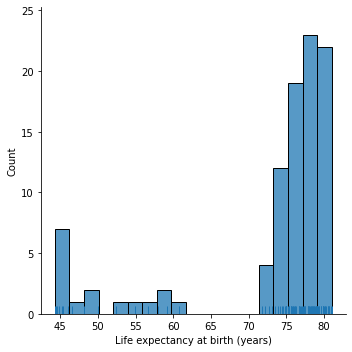

In [16]:
plt.figure(figsize=(8,6))
sns.displot(df.LEABY, rug=True, kde=False)
plt.xlabel("Life expectancy at birth (years)")

In [17]:
dfMeans = df.drop('Year', axis=1).groupby("Country").mean().reset_index()


Text(0.5, 0, 'Life expectancy at birth (years)')

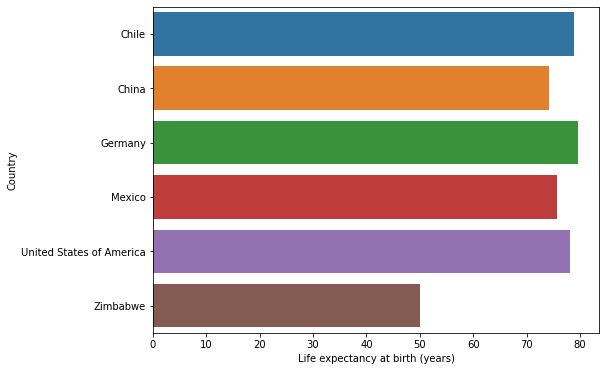

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY',y='Country', data=dfMeans)
plt.xlabel("Life expectancy at birth (years)")

Text(0.5, 0, 'GDP in trillions of U.S. Dollars')

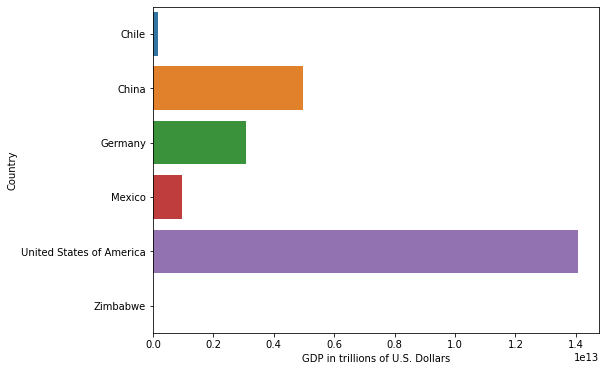

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x='GDP', y='Country', data=dfMeans)
plt.xlabel('GDP in trillions of U.S. Dollars')

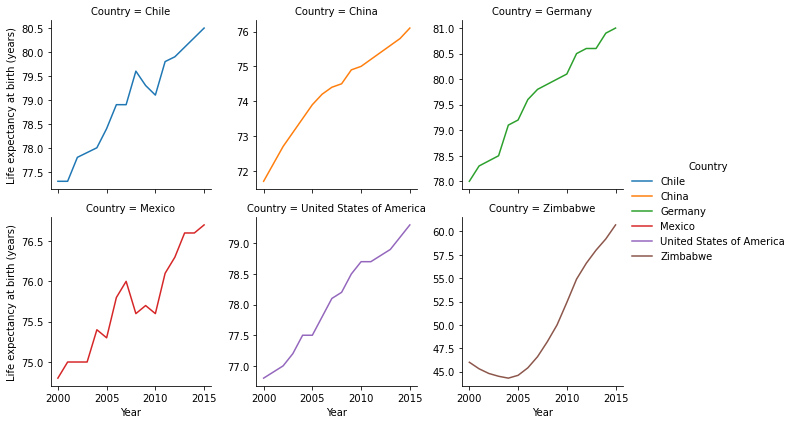

In [21]:
graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;

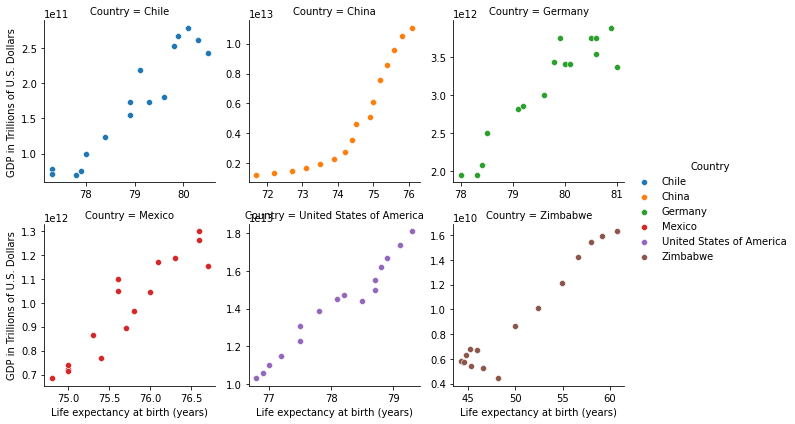

In [22]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));